In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

Min: 946.0
Max: 1564.0
Median: 1003.5
Mean: 1003.567104280912
StdDev: 4.460324386491092


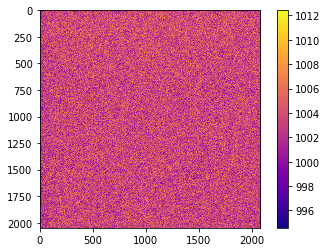

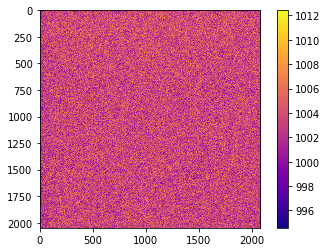

In [2]:
#this cell creates the master bias frame
biases = glob.glob("final/bias/spec*.fits")

images = [ fits.getdata(image) for image in biases ]
master_bias = np.median(images, axis=0)
print("Min: " + str(np.min(master_bias)))
print("Max: " + str(np.max(master_bias)))
print("Median: " + str(np.median(master_bias)))
print("Mean: " + str(np.mean(master_bias)))
print("StdDev: " + str(np.std(master_bias)))

#save file
hdu = fits.PrimaryHDU(master_bias)
hdu.writeto('master_bias.fits')

plt.figure()
vmin = np.median(master_bias)-2*np.std(master_bias)
vmax = np.median(master_bias)+2*np.std(master_bias)
plt.imshow(master_bias, "plasma",vmin=vmin, vmax=vmax)
plt.colorbar()

plt.figure()
img = fits.getdata('master_bias.fits')
vmin = np.median(img)-2*np.std(img)
vmax = np.median(img)+2*np.std(img)
plt.imshow(img, "plasma",vmin=vmin, vmax=vmax)
plt.colorbar()

plt.show()

Min: 997.0
Max: 143837.0
Median: 6883.5
Mean: 30476.275438279372
StdDev: 39976.61876538676
Normalized Min: -0.00032233210101839215
Normalized Max: 4.846246173964104
Normalized Median: 0.19950660568296272
Normalized Mean: 1.0000000000000007
Normalized StdDev: 1.3563928678531347


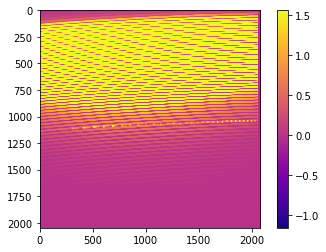

In [3]:
#this cell makes the U master flat
flat_u = glob.glob("final/flats/spec*.fits")

images = [ fits.getdata(image) for image in flat_u ]
master_flat_u = np.median(images, axis=0)
print("Min: " + str(np.min(master_flat_u)))
print("Max: " + str(np.max(master_flat_u)))
print("Median: " + str(np.median(master_flat_u)))
print("Mean: " + str(np.mean(master_flat_u)))
print("StdDev: " + str(np.std(master_flat_u)))

#bias and dark subtract where the dark has been scaled by exposure time
master_flat_u = master_flat_u - master_bias

#the flat must also be mean normalized
normalized_u = master_flat_u / np.mean(master_flat_u)
print("Normalized Min: " + str(np.min(normalized_u)))
print("Normalized Max: " + str(np.max(normalized_u)))
print("Normalized Median: " + str(np.median(normalized_u)))
print("Normalized Mean: " + str(np.mean(normalized_u)))
print("Normalized StdDev: " + str(np.std(normalized_u)))

#save the file
hdu = fits.PrimaryHDU(normalized_u)
hdu.writeto('master_flat_u.fits', overwrite=True)

vmin = np.median(normalized_u)-np.std(normalized_u)
vmax = np.median(normalized_u)+np.std(normalized_u)
plt.imshow(normalized_u, "plasma",vmin=vmin, vmax=vmax)
plt.colorbar()